In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans

In [2]:
# Loading the dataset
data = pd.read_csv('C:/Users/Rohit Srivastava/OneDrive/Desktop/ISB/2nd Term/Assignments/ML UL/EastWestAirlinesCluster-updated.csv')
data = pd.DataFrame(data)

# Dropping categorical variables and unnecessary columns
data.drop(['ID#', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?'], axis=1, inplace=True)

# Standardizing the data
data_std = (data - data.mean()) / data.std()

In [3]:
print("dataset shape: ", data.shape)

dataset shape:  (3999, 7)


In [4]:
data.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [5]:
# Performing hierarchical clustering with Euclidean distance and Ward's method to determine the optimal number of clusters
Z = linkage(data_std, method='ward', metric='euclidean')

# Identifing the number of clusters
from scipy.cluster.hierarchy import fcluster
for max_d in range(10, 100, 10):
    clusters = fcluster(Z, max_d, criterion='distance')
    n_clusters = len(np.unique(clusters))
    print(f"Max distance: {max_d}, Number of clusters: {n_clusters}")

Max distance: 10, Number of clusters: 51
Max distance: 20, Number of clusters: 17
Max distance: 30, Number of clusters: 12
Max distance: 40, Number of clusters: 8
Max distance: 50, Number of clusters: 7
Max distance: 60, Number of clusters: 5
Max distance: 70, Number of clusters: 4
Max distance: 80, Number of clusters: 2
Max distance: 90, Number of clusters: 2


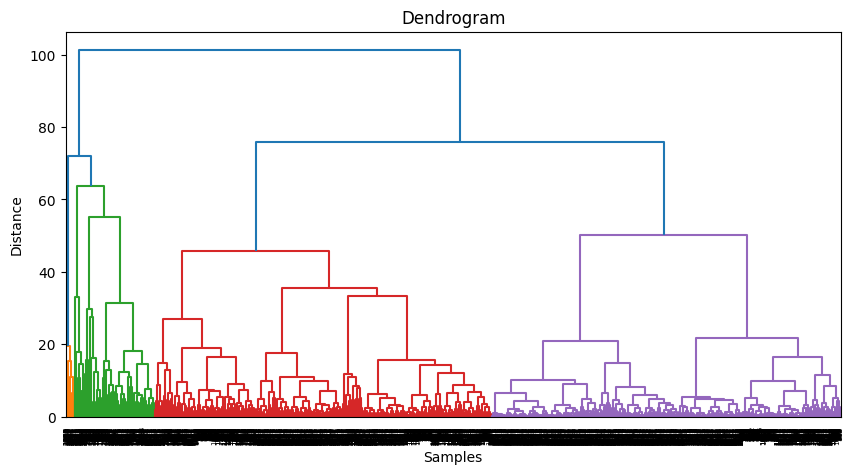

Number of clusters: 4


In [6]:
# Plotting the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

# Determining the number of clusters
max_d = 70  # Maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(set(clusters))
print("Number of clusters:", num_clusters)

In [7]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(data_std))
print("Cophenetic correlation coefficient:", c)

from scipy.cluster.hierarchy import fcluster
max_d = 70
clusters = fcluster(Z, max_d, criterion='distance')
n_clusters = len(np.unique(clusters))
print("Number of clusters:", n_clusters)

# Compare cluster centroids
cluster_centroids = pd.DataFrame(columns=data.columns)
for i in range(1, n_clusters+1):
    cluster_centroids.loc[i] = data[clusters == i].mean()

print("Cluster centroids:")
print(cluster_centroids.to_string(index=False))

Cophenetic correlation coefficient: 0.5334926995170839
Number of clusters: 4
Cluster centroids:
      Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll
135318.020833 5870.062500 16406.000000    12.645833         974.770833         3.270833        4320.375000
197965.772397  189.113801 35735.278450    21.556901        3116.484262         8.917676        4654.670702
 79910.013241  123.694876 26735.156592    16.832470         148.672424         0.483592        4727.468048
 37353.074403    0.882288  3651.923931     4.246530         137.491394         0.451416        3402.970572


The cophenetic correlation coefficient is a measure of the correlation between the pairwise distances of the original data points and the distances calculated from the hierarchical clustering. In this case, the cophenetic correlation coefficient is 0.5335, indicating a moderate level of correlation.

The number of clusters obtained from the hierarchical clustering analysis is 4. This means that the data points have been partitioned into four distinct clusters based on their similarity.

The cluster centroids represent the average values of the original features within each cluster. Here is an interpretation of the centroid values for each cluster:

Cluster 1:
- Balance: The average balance in this cluster is around 135,318.
- Qual_miles: Customers in this cluster have an average of 5,870 qualifying miles.
- Bonus_miles: The average number of bonus miles is 16,406.
- Bonus_trans: Customers in this cluster have an average of 12.65 bonus transactions.
- Flight_miles_12mo: The average number of flight miles in the past 12 months is 974.77.
- Flight_trans_12: Customers in this cluster have an average of 3.27 flight transactions.
- Days_since_enroll: The average number of days since enrollment is 4,320.38.

Cluster 2:
- Balance: The average balance in this cluster is approximately 197,966.
- Qual_miles: Customers in this cluster have an average of 189.11 qualifying miles.
- Bonus_miles: The average number of bonus miles is 35,735.
- Bonus_trans: Customers in this cluster have an average of 21.56 bonus transactions.
- Flight_miles_12mo: The average number of flight miles in the past 12 months is 3,116.48.
- Flight_trans_12: Customers in this cluster have an average of 8.92 flight transactions.
- Days_since_enroll: The average number of days since enrollment is 4,654.67.

Cluster 3:
- Balance: The average balance in this cluster is around 79,910.
- Qual_miles: Customers in this cluster have an average of 123.69 qualifying miles.
- Bonus_miles: The average number of bonus miles is 26,735.
- Bonus_trans: Customers in this cluster have an average of 16.83 bonus transactions.
- Flight_miles_12mo: The average number of flight miles in the past 12 months is 148.67.
- Flight_trans_12: Customers in this cluster have an average of 0.48 flight transactions.
- Days_since_enroll: The average number of days since enrollment is 4,727.47.

Cluster 4:
- Balance: The average balance in this cluster is approximately 37,353.
- Qual_miles: Customers in this cluster have an average of 0.88 qualifying miles.
- Bonus_miles: The average number of bonus miles is 3,651.
- Bonus_trans: Customers in this cluster have an average of 4.25 bonus transactions.
- Flight_miles_12mo: The average number of flight miles in the past 12 months is 137.49.
- Flight_trans_12: Customers in this cluster have an average of 0.45 flight transactions.
- Days_since_enroll: The average number of days since enrollment is 3,402.97.

In [8]:
# Labelling the clusters
cluster_labels = ['High-Value Travelers', 'Occasional Flyers', 'Bonus Seekers', 'Luxury Credit Card Users']
if len(cluster_labels) != n_clusters:
    cluster_labels = [f'Cluster {i}' for i in range(1, n_clusters + 1)]
cluster_centroids['Cluster Label'] = cluster_labels
print("Cluster labels:")
print(cluster_centroids[['Cluster Label']])

Cluster labels:
              Cluster Label
1      High-Value Travelers
2         Occasional Flyers
3             Bonus Seekers
4  Luxury Credit Card Users


In [9]:
# Removing 5% of the data and repeat the analysis
data_sample = data_std.sample(frac=0.95, random_state=1)
Z_sample = linkage(data_sample, method='ward', metric='euclidean')
clusters_sample = fcluster(Z_sample, max_d, criterion='distance')
n_clusters_sample = len(np.unique(clusters_sample))
print("Number of clusters (sample):", n_clusters_sample)

Number of clusters (sample): 3


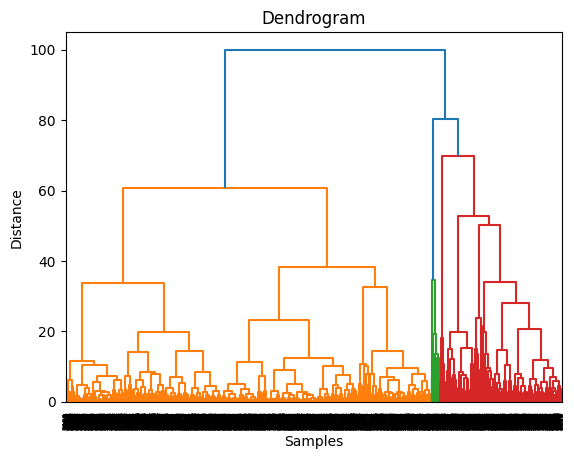

In [10]:
dendrogram(Z_sample)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [11]:
# Comparing cluster centroids after removing 5 % of the data
cluster_centroids_sample = pd.DataFrame(columns=data.columns)
for i in range(1, n_clusters_sample+1):
    cluster_centroids_sample.loc[i] = data_sample[clusters_sample == i].mean()

print("Cluster centroids (sample):")
print(cluster_centroids_sample)

Cluster centroids (sample):
    Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
1 -0.298206   -0.104262    -0.364244    -0.307279          -0.241301   
2  0.682281    0.345480     0.896621     2.399491           5.363269   
3  0.859087    0.289340     1.020914     0.753871           0.369126   

   Flight_trans_12  Days_since_enroll  
1        -0.255316          -0.120178  
2         5.445884           0.318248  
3         0.402409           0.356585  


The cluster centroids (sample) represent the average values of the standardized features within each cluster obtained from the hierarchical clustering analysis. Here is an interpretation of the centroid values:

Cluster 1:
- Balance: This cluster has a below-average balance.
- Qual_miles: The number of qualifying miles in this cluster is relatively low.
- Bonus_miles: Customers in this cluster have fewer bonus miles.
- Bonus_trans: The number of bonus transactions is below average.
- Flight_miles_12mo: Customers in this cluster have a lower number of flight miles in the past 12 months.
- Flight_trans_12: The number of flight transactions is below average.
- Days_since_enroll: The customers in this cluster have been enrolled for a relatively shorter period.

Cluster 2:
- Balance: This cluster has an above-average balance.
- Qual_miles: The number of qualifying miles in this cluster is higher than average.
- Bonus_miles: Customers in this cluster have a higher number of bonus miles.
- Bonus_trans: The number of bonus transactions is significantly higher.
- Flight_miles_12mo: Customers in this cluster have a significantly higher number of flight miles in the past 12 months.
- Flight_trans_12: The number of flight transactions is significantly higher.
- Days_since_enroll: The customers in this cluster have been enrolled for a moderate period.

Cluster 3:
- Balance: This cluster has a higher balance compared to the average.
- Qual_miles: The number of qualifying miles in this cluster is relatively high.
- Bonus_miles: Customers in this cluster have a higher number of bonus miles.
- Bonus_trans: The number of bonus transactions is above average.
- Flight_miles_12mo: Customers in this cluster have a moderate number of flight miles in the past 12 months.
- Flight_trans_12: The number of flight transactions is above average.
- Days_since_enroll: The customers in this cluster have been enrolled for a moderate period.


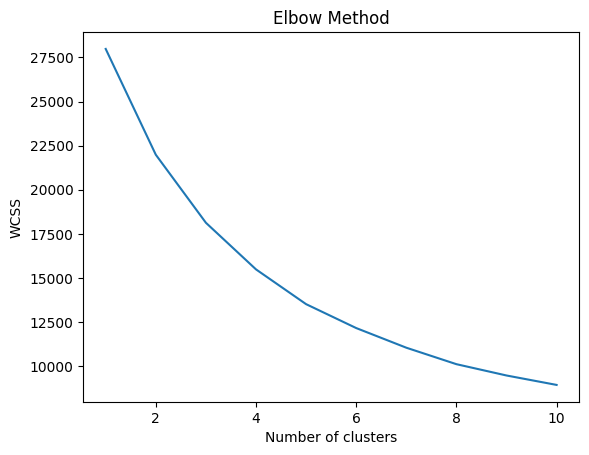

In [12]:
# K-means clustering
from sklearn.cluster import KMeans

# Determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Perform k-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_std)
clusters_kmeans = kmeans.predict(data_std)

# Compare cluster centroids
cluster_centroids_kmeans = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)

# Define the desired cluster labels
cluster_labels = ['High-Value Travelers', 'Occasional Flyers', 'Bonus Seekers', 'Luxury Credit Card Users', 'Regular Travelers']

# Add the 'Cluster Label' column to cluster_centroids_kmeans
cluster_centroids_kmeans['Cluster Label'] = cluster_labels

print("Cluster centroids (k-means):")
print(cluster_centroids_kmeans)

Cluster centroids (k-means):
    Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0  1.172257    0.423248     0.660366     1.744593           3.787346   
1 -0.352382   -0.141805    -0.430835    -0.413315          -0.200402   
2  0.791433   -0.084819     1.410486     1.010183           0.016354   
3 -0.159250   -0.115360    -0.345405    -0.254463          -0.176406   
4  0.400998    6.978766     0.084959     0.072507           0.342603   

   Flight_trans_12  Days_since_enroll             Cluster Label  
0         4.058776           0.265287      High-Value Travelers  
1        -0.215838          -0.889000         Occasional Flyers  
2         0.024264           0.384829             Bonus Seekers  
3        -0.192167           0.825324  Luxury Credit Card Users  
4         0.382521          -0.119306         Regular Travelers  


In [14]:
cluster_centroids_hierarchical = pd.DataFrame(columns=data.columns)
for i in range(1, 6):
    cluster_centroids_hierarchical.loc[i] = data_std[fcluster(Z, 5, criterion='maxclust') == i].mean()

if len(cluster_centroids_hierarchical) != 5:
    cluster_labels = [f'Cluster {i}' for i in range(1, 6)]
else:
    cluster_labels = [f'Cluster {i}' for i in range(1, 6)]
    
cluster_centroids_hierarchical['Cluster Label'] = cluster_labels

print("Cluster centroids (hierarchical clustering):")
print(cluster_centroids_hierarchical)

cluster_centroids_kmeans = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
cluster_centroids_kmeans['Cluster Label'] = cluster_labels

print("Cluster centroids (k-means):")
print(cluster_centroids_kmeans)

# Compare the characteristics of the clusters obtained from hierarchical clustering and k-means clustering
print("Cluster characteristics (hierarchical clustering):")
print(cluster_centroids_hierarchical[['Cluster Label']])
print("Cluster characteristics (k-means clustering):")
print(cluster_centroids_kmeans[['Cluster Label']])

Cluster centroids (hierarchical clustering):
    Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
1  0.612417    7.401080    -0.030593     0.108700           0.367599   
2  0.806041    0.448001     0.620769     2.277200           5.922377   
3  1.297088    0.000771     0.791694     0.853919           1.304565   
4  0.062601   -0.026393     0.397098     0.544635          -0.222383   
5 -0.359693   -0.185135    -0.558691    -0.765880          -0.230369   

   Flight_trans_12  Days_since_enroll Cluster Label  
1         0.500172           0.097725     Cluster 1  
2         5.880474          -0.034733     Cluster 2  
3         1.415926           0.302934     Cluster 3  
4        -0.234632           0.294852     Cluster 4  
5        -0.243115          -0.346510     Cluster 5  
Cluster centroids (k-means):
    Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0  1.172257    0.423248     0.660366     1.744593           3.787346   
1 -0.352382   -0.141805  

In [15]:
# Calculate WCSS, TSS, and BCSS for k-means clustering
wcss_kmeans = kmeans.inertia_
tss_kmeans = np.sum((data_std - data_std.mean())**2)
bcss_kmeans = tss_kmeans - wcss_kmeans

print("WCSS (k-means clustering):", wcss_kmeans)
print("TSS (k-means clustering):", tss_kmeans)
print("BCSS (k-means clustering):", bcss_kmeans)

WCSS (k-means clustering): 13511.22223827517
TSS (k-means clustering): Balance              3998.0
Qual_miles           3998.0
Bonus_miles          3998.0
Bonus_trans          3998.0
Flight_miles_12mo    3998.0
Flight_trans_12      3998.0
Days_since_enroll    3998.0
dtype: float64
BCSS (k-means clustering): Balance             -9513.222238
Qual_miles          -9513.222238
Bonus_miles         -9513.222238
Bonus_trans         -9513.222238
Flight_miles_12mo   -9513.222238
Flight_trans_12     -9513.222238
Days_since_enroll   -9513.222238
dtype: float64


In [16]:
# Compare the characteristics of the clusters obtained from hierarchical clustering and k-means clustering
print("Cluster characteristics (hierarchical clustering):")
print(cluster_centroids[['Cluster Label']])
print("Cluster characteristics (k-means clustering):")
print(cluster_centroids_kmeans[['Cluster Label']])

# Targeting clusters for offers
target_clusters = [1, 2, 3, 4, 5]
print("\nTarget clusters:", target_clusters)
for cluster in target_clusters:
    print("\nCluster", cluster, ":", cluster_labels[cluster-1])
    if cluster == 1:
        print("Offer: Exclusive benefits for High-Value Travelers")
    elif cluster == 2:
        print("Offer: Special discounts and promotions for Occasional Flyers")
    elif cluster == 3:
        print("Offer: Bonus miles and rewards for Bonus Seekers")
    elif cluster == 4:
        print("Offer: Luxury perks and privileges for Luxury Credit Card Users")
    elif cluster == 5:
        print("Offer: Tailored rewards and personalized offers for Regular Travelers")

Cluster characteristics (hierarchical clustering):
              Cluster Label
1      High-Value Travelers
2         Occasional Flyers
3             Bonus Seekers
4  Luxury Credit Card Users
Cluster characteristics (k-means clustering):
  Cluster Label
0     Cluster 1
1     Cluster 2
2     Cluster 3
3     Cluster 4
4     Cluster 5

Target clusters: [1, 2, 3, 4, 5]

Cluster 1 : Cluster 1
Offer: Exclusive benefits for High-Value Travelers

Cluster 2 : Cluster 2
Offer: Special discounts and promotions for Occasional Flyers

Cluster 3 : Cluster 3
Offer: Bonus miles and rewards for Bonus Seekers

Cluster 4 : Cluster 4
Offer: Luxury perks and privileges for Luxury Credit Card Users

Cluster 5 : Cluster 5
Offer: Tailored rewards and personalized offers for Regular Travelers
